In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
import warnings
np.set_printoptions(suppress=True)
warnings.filterwarnings("ignore")

In [2]:
def plot(dataset, include_columns=None, exclude_columns=None,box= False ,hist=False, rows=1, cols=1, suptitle=''):
    if include_columns:
        columns_list = include_columns
    elif exclude_columns:
        columns_list = [col for col in dataset.columns if col not in exclude_columns]
    else:
        columns_list = list(dataset.columns)

    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16, 16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    
    
    for i, data in enumerate(columns_list):
        if box == True:
            sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        elif hist == True:
            sns.histplot(dataset[data], ax=axs[i], kde =True)

        skewness = dataset[data].skew(skipna=True)
        kurtosis = dataset[data].kurt(skipna=True)

        axs[i].set_title(data)

        axs[i].text(
            0.5, 1.4,
            f'Skewness: {round(skewness, 2)}\nKurtosis: {round(kurtosis, 2)}',
            transform=axs[i].transAxes,
            ha='center',
            fontsize=14,
            color='black',
            style='italic',
            bbox={'facecolor': 'white', 'edgecolor': 'black', 'alpha': 0.8}
        )

    plt.tight_layout()
    plt.show()

In [3]:
mds = pd.read_csv("mobile.csv")

In [4]:
mds.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
mds.duplicated().sum()

0

In [7]:
mds.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


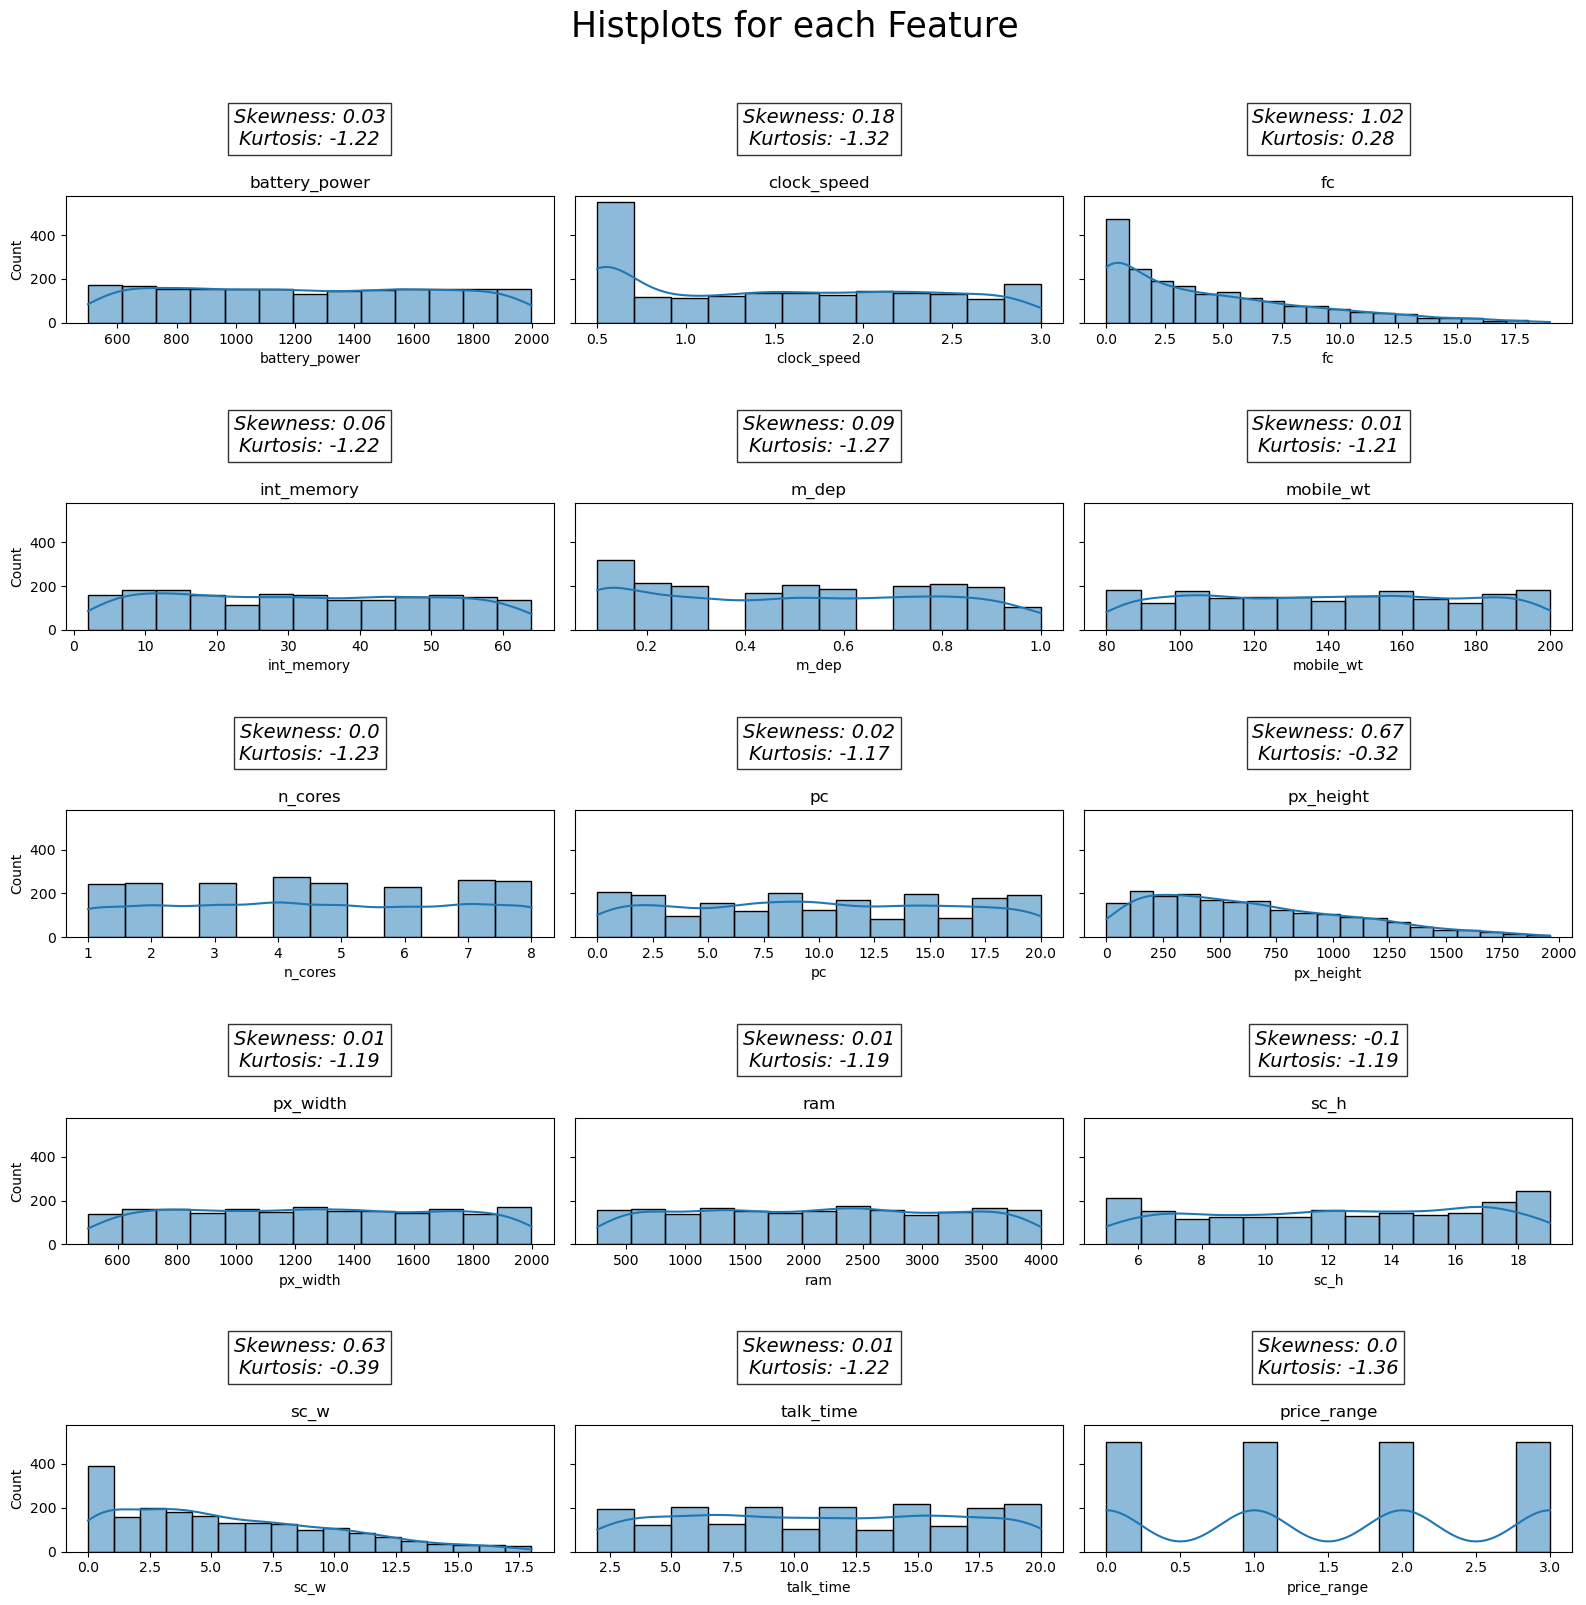

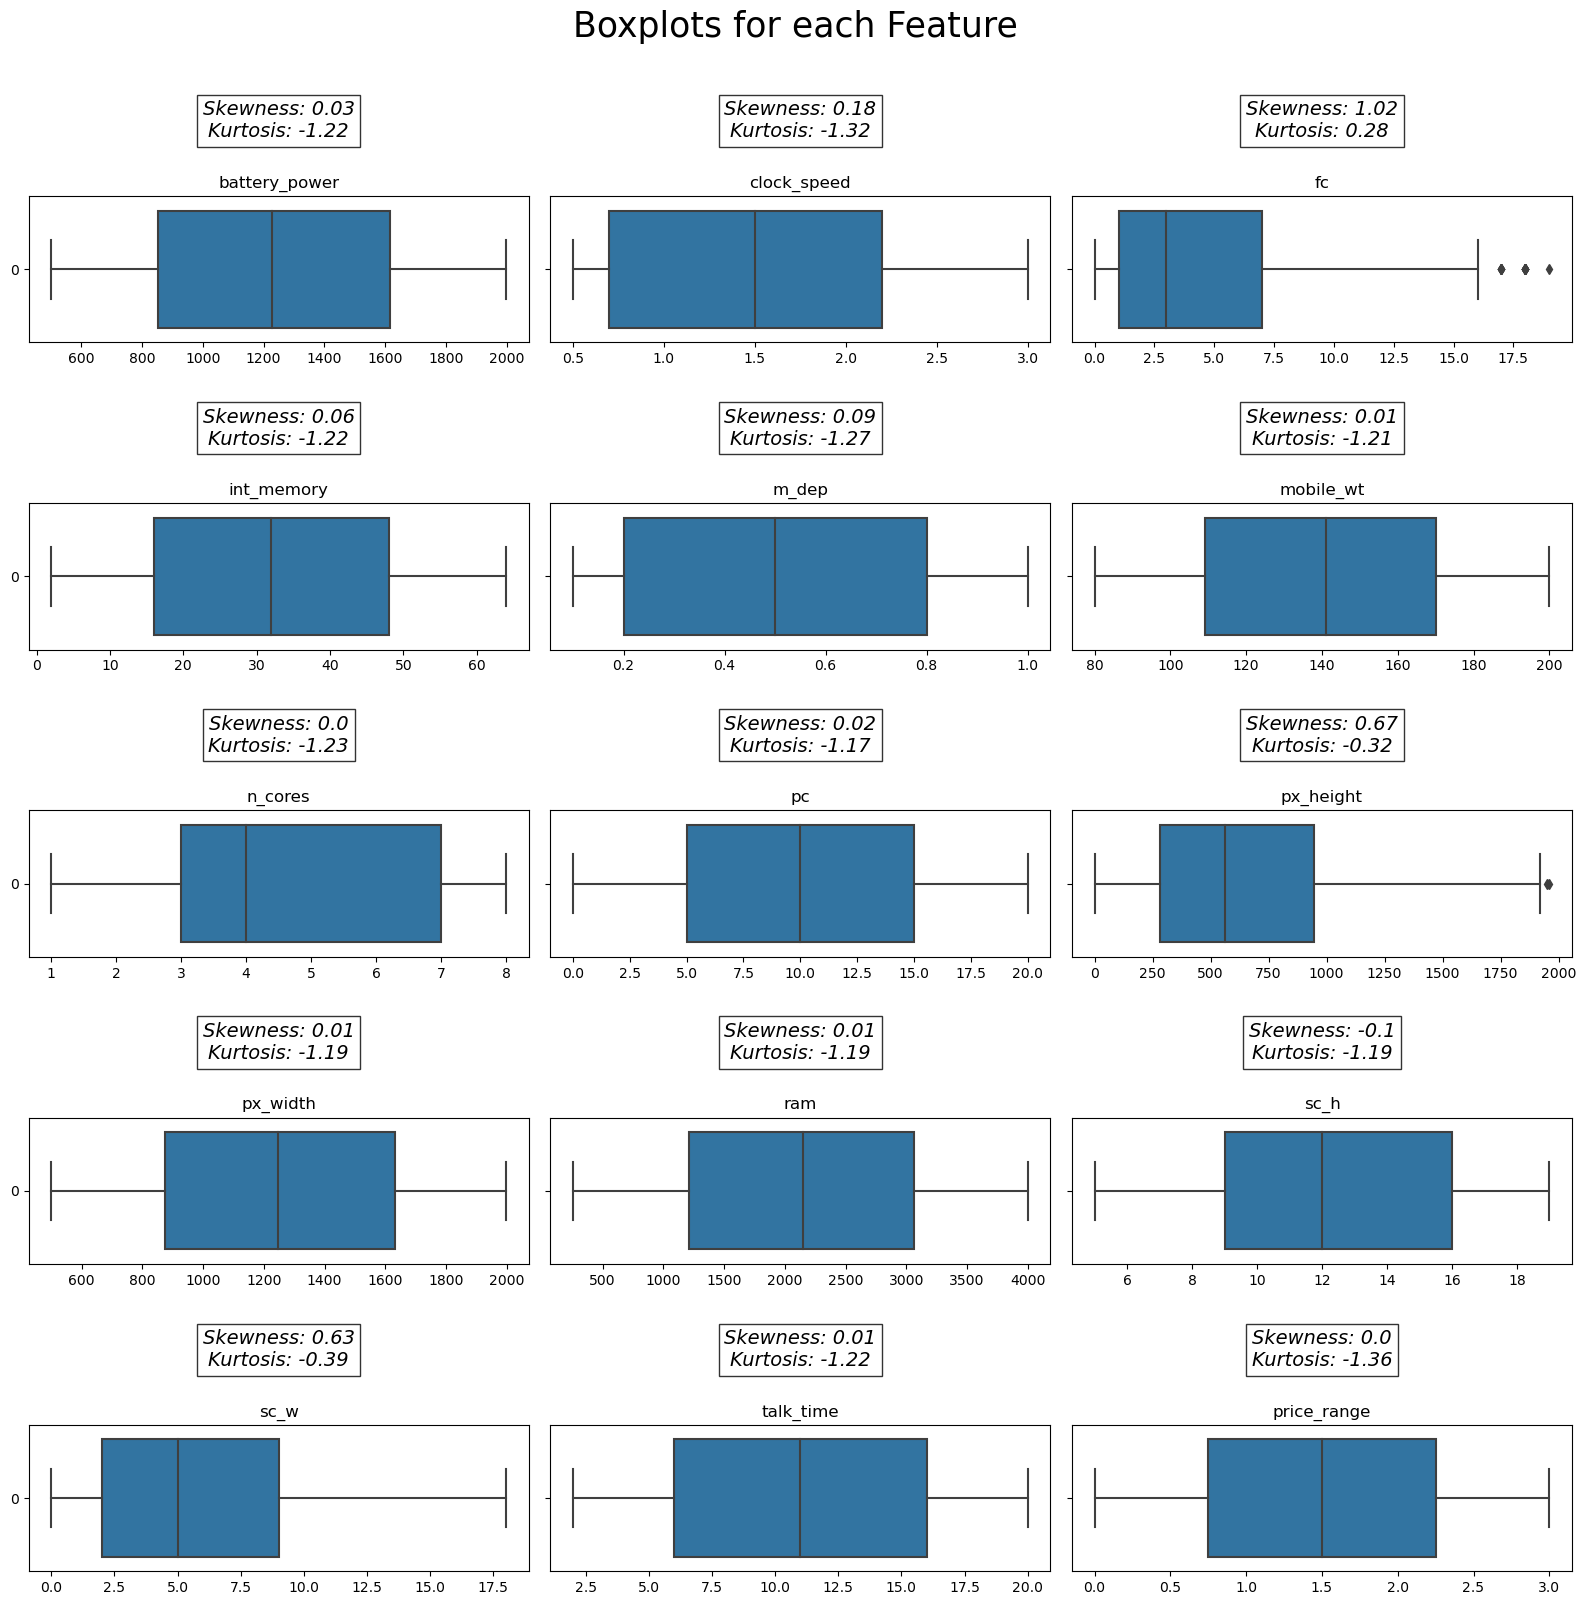

In [8]:
exclude_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
plot(mds , exclude_columns=exclude_columns, hist=True , rows=5, cols=3, suptitle='Histplots for each Feature')
plot(mds , exclude_columns=exclude_columns, box=True , rows=5, cols=3, suptitle='Boxplots for each Feature')

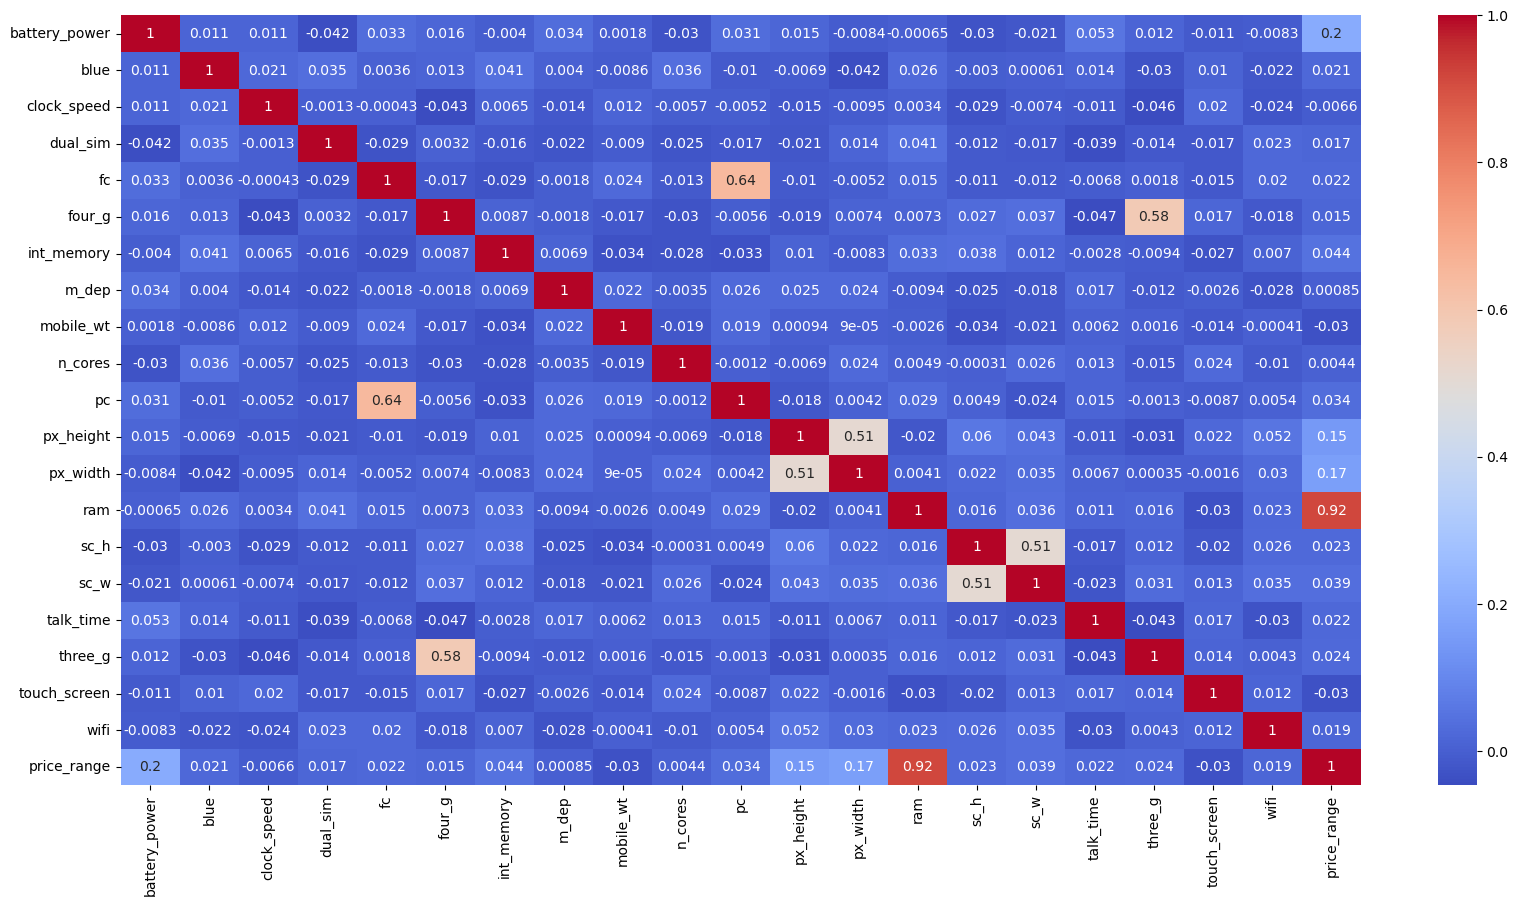

In [9]:
plt.figure(figsize=(20, 10))
correlation_matrix = mds.corr()
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.show()

In [10]:
x = mds.drop(["price_range"],axis=1)
y = mds[["price_range"]]

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [12]:
feature_scores = mutual_info_classif(x_train, y_train, random_state=42)

In [13]:
threshold = 10
high_score_features = []
for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)


ram 0.8448410727570759
px_height 0.03531076391251986
touch_screen 0.03216025833107006
battery_power 0.028098295588342648
int_memory 0.02549314271485681
dual_sim 0.025394210354913405
four_g 0.021778976624755586
px_width 0.01767124811992815
talk_time 0.015992521834208517
mobile_wt 0.012563518758101466


In [14]:
x_train = x_train[high_score_features]
x_test = x_test[high_score_features]

In [15]:
display(x_train.head(),x_test.head(),y_train.head(),y_test.head())

,ram,px_height,touch_screen,battery_power,int_memory,dual_sim,four_g,px_width,talk_time,mobile_wt
1738,2378,367,0,511,24,1,1,1264,4,136
548,3595,417,1,641,7,0,1,759,19,192
936,3647,1262,0,805,34,0,0,1538,9,88
1389,258,100,0,1801,52,1,0,1708,9,120
1607,2700,1252,0,744,33,1,1,1963,19,105


,ram,px_height,touch_screen,battery_power,int_memory,dual_sim,four_g,px_width,talk_time,mobile_wt
1860,686,211,1,1646,25,0,1,1608,11,200
353,2563,275,0,1182,8,0,1,986,19,138
1333,1316,293,1,1972,14,0,0,952,8,196
905,3892,256,1,989,17,0,0,1394,19,166
1289,1906,1021,0,615,58,1,0,1958,5,130


,price_range
1738,1
548,2
936,3
1389,0
1607,2


,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [16]:
pca = PCA(n_components=10, random_state=42)
pca.fit(x_train)

PCA(n_components=10, random_state=42)

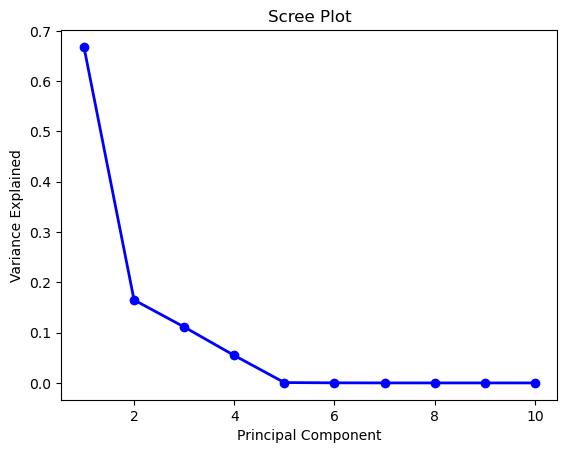

In [17]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
pca = PCA(n_components=5)
pca.fit(x_train)

PCA(n_components=5)

In [19]:
pd.DataFrame(data = pca.components_.T,  columns=pca.get_feature_names_out(), index=pca.feature_names_in_)

,pca0,pca1,pca2,pca3,pca4
ram,0.999954,0.004505,0.005750,-0.006201,-0.000044
px_height,-0.007374,0.728520,-0.026730,-0.684459,0.001956
touch_screen,-0.000028,0.000001,-0.000008,-0.000019,0.000277
battery_power,-0.005813,0.075025,0.996320,0.041003,-0.001642
int_memory,0.000798,-0.000460,-0.000093,-0.002287,0.033992
dual_sim,0.000025,-0.000010,-0.000044,0.000062,-0.000187
four_g,0.000009,0.000006,0.000018,0.000048,0.000275
px_width,0.001915,0.680885,-0.081215,0.727867,0.001156
talk_time,-0.000021,0.000114,0.000652,0.000428,-0.000385
mobile_wt,-0.000019,0.002074,-0.001787,-0.000643,-0.999418


In [20]:
x_train = pd.DataFrame(data= pca.transform(x_train), columns= pca.get_feature_names_out())
x_test = pd.DataFrame(data= pca.transform(x_test), columns= pca.get_feature_names_out())

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1500, 5), (1500, 1), (500, 5), (500, 1))

In [22]:
from xgboost import XGBClassifier

In [23]:
bst = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.1, objective='multi:softmax', num_class=4
                   , gamma=0.2)


In [24]:
bst.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [25]:
res_train = bst.predict(x_train)
res = bst.predict(x_test)

<Axes: >

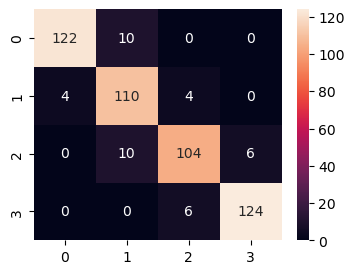

In [26]:
plt.figure(figsize=(4, 3))

sns.heatmap(confusion_matrix(y_test,
                             res)
           ,annot=True
           ,fmt='d')

In [27]:
print("Train accuracy: ",  accuracy_score(y_train, res_train, normalize=True))
print("Test accuracy: ", accuracy_score(y_test, res, normalize=True))

Train accuracy:  1.0
Test accuracy:  0.92


In [28]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [29]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/100


38/38 - 4s - loss: 0.9717 - accuracy: 0.5917 - val_loss: 2.0356 - val_accuracy: 0.4900 - 4s/epoch - 110ms/step
Epoch 2/100
38/38 - 0s - loss: 0.5058 - accuracy: 0.7917 - val_loss: 1.0603 - val_accuracy: 0.6700 - 127ms/epoch - 3ms/step
Epoch 3/100
38/38 - 0s - loss: 0.4255 - accuracy: 0.8233 - val_loss: 0.6483 - val_accuracy: 0.7867 - 127ms/epoch - 3ms/step
Epoch 4/100
38/38 - 0s - loss: 0.4035 - accuracy: 0.8275 - val_loss: 0.4065 - val_accuracy: 0.8567 - 120ms/epoch - 3ms/step
Epoch 5/100
38/38 - 0s - loss: 0.3805 - accuracy: 0.8408 - val_loss: 0.3062 - val_accuracy: 0.8967 - 118ms/epoch - 3ms/step
Epoch 6/100
38/38 - 0s - loss: 0.3339 - accuracy: 0.8650 - val_loss: 0.2076 - val_accuracy: 0.9233 - 121ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 0.3620 - accuracy: 0.8508 - val_loss: 0.1777 - val_accuracy: 0.9267 - 121ms/epoch - 3ms/step
Epoch 8/100
38/38 - 0s - loss: 0.3926 - accuracy: 0.8442 - val_loss: 0.2333 - val_accuracy: 0.9133 - 119ms/epoch - 3ms/step
Epoch 

Epoch 62/100
38/38 - 0s - loss: 0.2055 - accuracy: 0.9108 - val_loss: 0.1400 - val_accuracy: 0.9333 - 124ms/epoch - 3ms/step
Epoch 63/100
38/38 - 0s - loss: 0.2237 - accuracy: 0.9042 - val_loss: 0.1524 - val_accuracy: 0.9300 - 122ms/epoch - 3ms/step
Epoch 64/100
38/38 - 0s - loss: 0.2160 - accuracy: 0.9058 - val_loss: 0.1418 - val_accuracy: 0.9433 - 119ms/epoch - 3ms/step
Epoch 65/100
38/38 - 0s - loss: 0.2165 - accuracy: 0.9133 - val_loss: 0.1255 - val_accuracy: 0.9367 - 119ms/epoch - 3ms/step
Epoch 66/100
38/38 - 0s - loss: 0.2303 - accuracy: 0.9050 - val_loss: 0.1179 - val_accuracy: 0.9500 - 121ms/epoch - 3ms/step
Epoch 67/100
38/38 - 0s - loss: 0.2365 - accuracy: 0.9042 - val_loss: 0.1403 - val_accuracy: 0.9367 - 123ms/epoch - 3ms/step
Epoch 68/100
38/38 - 0s - loss: 0.2525 - accuracy: 0.8875 - val_loss: 0.1227 - val_accuracy: 0.9433 - 120ms/epoch - 3ms/step
Epoch 69/100
38/38 - 0s - loss: 0.2538 - accuracy: 0.8967 - val_loss: 0.1384 - val_accuracy: 0.9367 - 124ms/epoch - 3ms/step


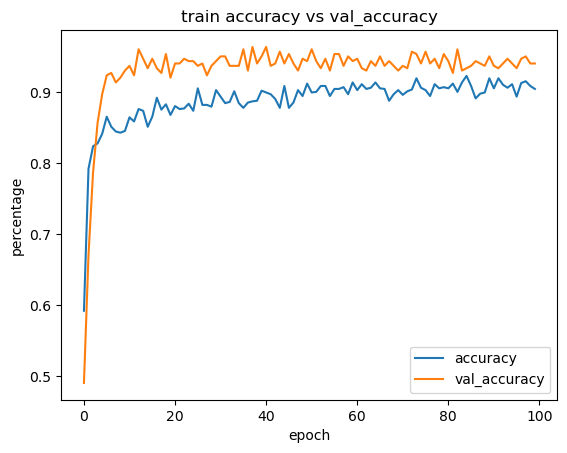

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('train accuracy vs val_accuracy')
plt.ylabel('percentage')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show() 

In [31]:
model.evaluate(x=x_test,y=y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9400


[0.12664173543453217, 0.9399999976158142]

In [32]:
y_pred = model.predict(x_test)

16/16 [==============================] - 0s 1ms/step


In [33]:
y_pred = np.argmax(y_pred,axis=1)

In [34]:
pd.DataFrame(classification_report(y_test, y_pred,output_dict = True)).T

,precision,recall,f1-score,support
0,0.904110,1.000000,0.949640,132.00
1,0.945455,0.881356,0.912281,118.00
2,1.000000,0.866667,0.928571,120.00
3,0.928571,1.000000,0.962963,130.00
accuracy,0.940000,0.940000,0.940000,0.94
macro avg,0.944534,0.937006,0.938364,500.00
weighted avg,0.943241,0.940000,0.939231,500.00


In [35]:
list(mds.var().sort_values().tail().index)

['mobile_wt', 'px_width', 'battery_power', 'px_height', 'ram']

In [36]:
varlist = mds[list(mds.var().sort_values().tail(6).index)]

In [37]:
ssd = []
for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(varlist)    
    ssd.append(kmeans.inertia_)

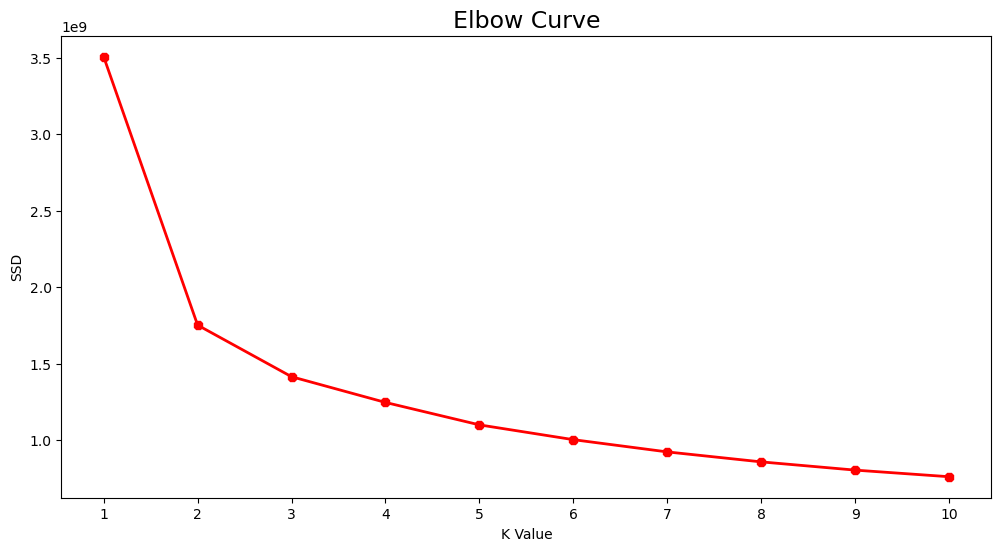

In [38]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=17)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD");

In [39]:
km = KMeans(n_clusters = 2)
km.fit(varlist)

KMeans(n_clusters=2)

In [40]:
three_componenets_pca = PCA(n_components=3, random_state=42)

In [41]:
clustered_data = three_componenets_pca.fit_transform(varlist)

In [42]:
labels = kmeans.predict(varlist)                      
centroids = kmeans.cluster_centers_          

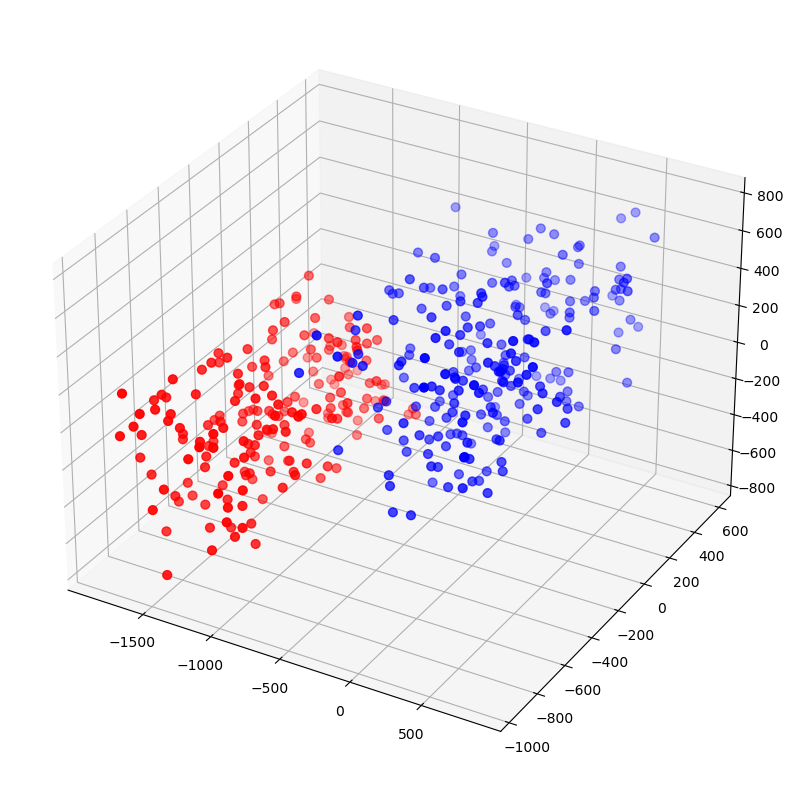

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')

x = np.array(labels==0)
y = np.array(labels==1)

ax.scatter(clustered_data[x,0],clustered_data[x,1],clustered_data[x,2],c="blue",s=40,label="C1")
ax.scatter(clustered_data[y,0],clustered_data[y,1],clustered_data[y,2],c="red",s=40,label="C2")
